In [ ]:
KIWI POWEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEERRRRR!!!


# Data Description

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For maching learning algorithm
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn import preprocessing

In [ ]:
# Importing data
amazon_df = pd.read_csv("Amazon.csv")
amazon_df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude,MA7,...,MA30,Daily Return,True Range (TR),Average True Range (ATR),Relative Strength Index (RSI),Annual growth percentage,Percentage of daily growth,Absolute Daily Growth,Day,Month
0,0,2014-06-10,40.840000,41.150002,40.810001,41.070000,29.667635,9168600,0.340000,NaN,...,NaN,NaN,0.340000,NaN,NaN,6.622551,NaN,NaN,Tuesday,June
1,1,2014-06-11,40.980000,41.060001,40.790001,40.860001,29.515940,9648600,0.270000,NaN,...,NaN,-0.005113,0.270000,NaN,0.000000,6.622551,-0.511320,-0.209999,Wednesday,June
2,2,2014-06-12,40.410000,40.680000,40.369999,40.419998,29.417683,11583600,0.310001,NaN,...,NaN,-0.010769,0.310001,NaN,0.000000,6.622551,-1.076854,-0.440002,Thursday,June
3,3,2014-06-13,40.389999,40.529999,40.250000,40.369999,29.381300,9194600,0.279999,NaN,...,NaN,-0.001237,0.279999,NaN,0.000000,6.622551,-0.123699,-0.049999,Friday,June
4,4,2014-06-16,40.189999,40.770000,40.150002,40.660000,29.592360,12878200,0.619999,NaN,...,NaN,0.007184,0.619999,NaN,29.292972,6.622551,0.718358,0.290001,Monday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2512,2024-06-03,62.709999,63.090000,62.450001,62.930000,62.445465,9369000,0.639999,62.205715,...,62.338667,0.000000,0.639999,0.655000,42.630374,6.622551,0.000000,0.000000,Monday,June
2513,2513,2024-06-04,63.200001,63.970001,62.939999,63.939999,63.447685,11895600,1.030003,62.470000,...,62.451667,0.016050,1.030003,0.660000,58.502028,6.622551,1.604955,1.009998,Tuesday,June
2514,2514,2024-06-05,63.990002,64.070000,63.349998,63.919998,63.427837,9632500,0.720001,62.744286,...,62.561000,-0.000313,0.720001,0.683572,58.012147,6.622551,-0.031280,-0.020000,Wednesday,June
2515,2515,2024-06-06,63.919998,64.360001,63.840000,64.150002,63.656071,8658500,0.520000,63.077143,...,62.647667,0.003598,0.520000,0.673572,58.350117,6.622551,0.359830,0.230003,Thursday,June


In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2517 non-null   int64  
 1   Date                           2517 non-null   object 
 2   Open                           2517 non-null   float64
 3   High                           2517 non-null   float64
 4   Low                            2517 non-null   float64
 5   Close                          2517 non-null   float64
 6   Adj Close                      2517 non-null   float64
 7   Volume                         2517 non-null   int64  
 8   Amplitude                      2517 non-null   float64
 9   MA7                            2511 non-null   float64
 10  MA14                           2504 non-null   float64
 11  MA30                           2488 non-null   float64
 12  Daily Return                   2516 non-null   f

In [ ]:
amazon_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude,MA7,...,MA30,Daily Return,True Range (TR),Average True Range (ATR),Relative Strength Index (RSI),Annual growth percentage,Percentage of daily growth,Absolute Daily Growth,Day,Month
0,0,2014-06-10,40.840000,41.150002,40.810001,41.070000,29.667635,9168600,0.340000,NaN,...,NaN,NaN,0.340000,NaN,NaN,6.622551,NaN,NaN,Tuesday,June
1,1,2014-06-11,40.980000,41.060001,40.790001,40.860001,29.515940,9648600,0.270000,NaN,...,NaN,-0.005113,0.270000,NaN,0.000000,6.622551,-0.511320,-0.209999,Wednesday,June
2,2,2014-06-12,40.410000,40.680000,40.369999,40.419998,29.417683,11583600,0.310001,NaN,...,NaN,-0.010769,0.310001,NaN,0.000000,6.622551,-1.076854,-0.440002,Thursday,June
3,3,2014-06-13,40.389999,40.529999,40.250000,40.369999,29.381300,9194600,0.279999,NaN,...,NaN,-0.001237,0.279999,NaN,0.000000,6.622551,-0.123699,-0.049999,Friday,June
4,4,2014-06-16,40.189999,40.770000,40.150002,40.660000,29.592360,12878200,0.619999,NaN,...,NaN,0.007184,0.619999,NaN,29.292972,6.622551,0.718358,0.290001,Monday,June


In [ ]:
amazon_df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude,MA7,...,MA30,Daily Return,True Range (TR),Average True Range (ATR),Relative Strength Index (RSI),Annual growth percentage,Percentage of daily growth,Absolute Daily Growth,Day,Month
2512,2512,2024-06-03,62.709999,63.090000,62.450001,62.930000,62.445465,9369000,0.639999,62.205715,...,62.338667,0.000000,0.639999,0.655000,42.630374,6.622551,0.000000,0.000000,Monday,June
2513,2513,2024-06-04,63.200001,63.970001,62.939999,63.939999,63.447685,11895600,1.030003,62.470000,...,62.451667,0.016050,1.030003,0.660000,58.502028,6.622551,1.604955,1.009998,Tuesday,June
2514,2514,2024-06-05,63.990002,64.070000,63.349998,63.919998,63.427837,9632500,0.720001,62.744286,...,62.561000,-0.000313,0.720001,0.683572,58.012147,6.622551,-0.031280,-0.020000,Wednesday,June
2515,2515,2024-06-06,63.919998,64.360001,63.840000,64.150002,63.656071,8658500,0.520000,63.077143,...,62.647667,0.003598,0.520000,0.673572,58.350117,6.622551,0.359830,0.230003,Thursday,June
2516,2516,2024-06-07,64.089996,64.220001,63.810001,63.910000,63.417919,9523100,0.410000,63.392857,...,62.720000,-0.003741,0.410000,0.672143,58.943097,6.622551,-0.374126,-0.240002,Friday,June


# Data Cleaning

In [ ]:
# Removing the extra index column

del amazon_df["Unnamed: 0"]
del amazon_df["Annual growth percentage"]
del amazon_df["Percentage of daily growth"]
del amazon_df["Daily Return"]
amazon_df

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude,MA7,MA14,MA30,True Range (TR),Average True Range (ATR),Relative Strength Index (RSI),Absolute Daily Growth,Day,Month
0,2014-06-10,40.840000,41.150002,40.810001,41.070000,29.667635,9168600,0.340000,NaN,NaN,NaN,0.340000,NaN,NaN,NaN,Tuesday,June
1,2014-06-11,40.980000,41.060001,40.790001,40.860001,29.515940,9648600,0.270000,NaN,NaN,NaN,0.270000,NaN,0.000000,-0.209999,Wednesday,June
2,2014-06-12,40.410000,40.680000,40.369999,40.419998,29.417683,11583600,0.310001,NaN,NaN,NaN,0.310001,NaN,0.000000,-0.440002,Thursday,June
3,2014-06-13,40.389999,40.529999,40.250000,40.369999,29.381300,9194600,0.279999,NaN,NaN,NaN,0.279999,NaN,0.000000,-0.049999,Friday,June
4,2014-06-16,40.189999,40.770000,40.150002,40.660000,29.592360,12878200,0.619999,NaN,NaN,NaN,0.619999,NaN,29.292972,0.290001,Monday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2024-06-03,62.709999,63.090000,62.450001,62.930000,62.445465,9369000,0.639999,62.205715,62.607143,62.338667,0.639999,0.655000,42.630374,0.000000,Monday,June
2513,2024-06-04,63.200001,63.970001,62.939999,63.939999,63.447685,11895600,1.030003,62.470000,62.667143,62.451667,1.030003,0.660000,58.502028,1.009998,Tuesday,June
2514,2024-06-05,63.990002,64.070000,63.349998,63.919998,63.427837,9632500,0.720001,62.744286,62.723571,62.561000,0.720001,0.683572,58.012147,-0.020000,Wednesday,June
2515,2024-06-06,63.919998,64.360001,63.840000,64.150002,63.656071,8658500,0.520000,63.077143,62.782857,62.647667,0.520000,0.673572,58.350117,0.230003,Thursday,June


In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           2517 non-null   object 
 1   Open                           2517 non-null   float64
 2   High                           2517 non-null   float64
 3   Low                            2517 non-null   float64
 4   Close                          2517 non-null   float64
 5   Adj Close                      2517 non-null   float64
 6   Volume                         2517 non-null   int64  
 7   Amplitude                      2517 non-null   float64
 8   MA7                            2511 non-null   float64
 9   MA14                           2504 non-null   float64
 10  MA30                           2488 non-null   float64
 11  True Range (TR)                2517 non-null   float64
 12  Average True Range (ATR)       2504 non-null   f

In [ ]:
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}

day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7
}

amazon_df['Day'] = amazon_df['Day'].map(day_mapping)
amazon_df['Month'] = amazon_df['Month'].map(month_mapping)

In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           2517 non-null   datetime64[ns]
 1   Open                           2517 non-null   float64       
 2   High                           2517 non-null   float64       
 3   Low                            2517 non-null   float64       
 4   Close                          2517 non-null   float64       
 5   Adj Close                      2517 non-null   float64       
 6   Volume                         2517 non-null   int64         
 7   Amplitude                      2517 non-null   float64       
 8   MA7                            2511 non-null   float64       
 9   MA14                           2504 non-null   float64       
 10  MA30                           2488 non-null   float64       
 11  True Range (TR)  

In [ ]:
# Deleting NaN values

print(amazon_df.isna().sum())
amazon_df = amazon_df.drop(amazon_df.index[range(29)])

Date                              0
Open                              0
High                              0
Low                               0
Close                             0
Adj Close                         0
Volume                            0
Amplitude                         0
MA7                               6
MA14                             13
MA30                             29
True Range (TR)                   0
Average True Range (ATR)         13
Relative Strength Index (RSI)     1
Absolute Daily Growth             1
Day                               0
Month                             0
dtype: int64


In [ ]:
# Check to see if rows have been deleted
print(amazon_df.isna().sum())

Date                             0
Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
Amplitude                        0
MA7                              0
MA14                             0
MA30                             0
True Range (TR)                  0
Average True Range (ATR)         0
Relative Strength Index (RSI)    0
Absolute Daily Growth            0
Day                              0
Month                            0
dtype: int64


In [ ]:
# Printing the head of the dataframe once again
amazon_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude,MA7,MA14,MA30,True Range (TR),Average True Range (ATR),Relative Strength Index (RSI),Absolute Daily Growth,Day,Month
29,2014-07-22,41.099998,41.330002,40.610001,41.189999,29.978088,24706000,0.720001,42.091428,42.101428,41.772333,0.720001,0.420714,33.918105,-1.210003,2,7
30,2014-07-23,40.980000,41.049999,40.630001,40.810001,29.701536,17531700,0.419998,41.867143,41.995714,41.763666,0.419998,0.432143,30.526318,-0.379997,3,7
31,2014-07-24,40.970001,41.099998,40.660000,40.970001,29.817980,14856000,0.439999,41.705715,41.905714,41.767333,0.439999,0.441428,33.846166,0.160000,4,7
32,2014-07-25,40.919998,41.040001,40.810001,41.000000,29.839819,10809900,0.230000,41.545715,41.824286,41.786666,0.230000,0.438571,35.156244,0.029999,5,7
33,2014-07-28,40.990002,41.000000,40.610001,40.680000,29.606913,11709100,0.389999,41.354286,41.734286,41.797000,0.389999,0.442142,34.090911,-0.320000,1,7


# Visualization of data

<Figure size 1400x800 with 0 Axes>

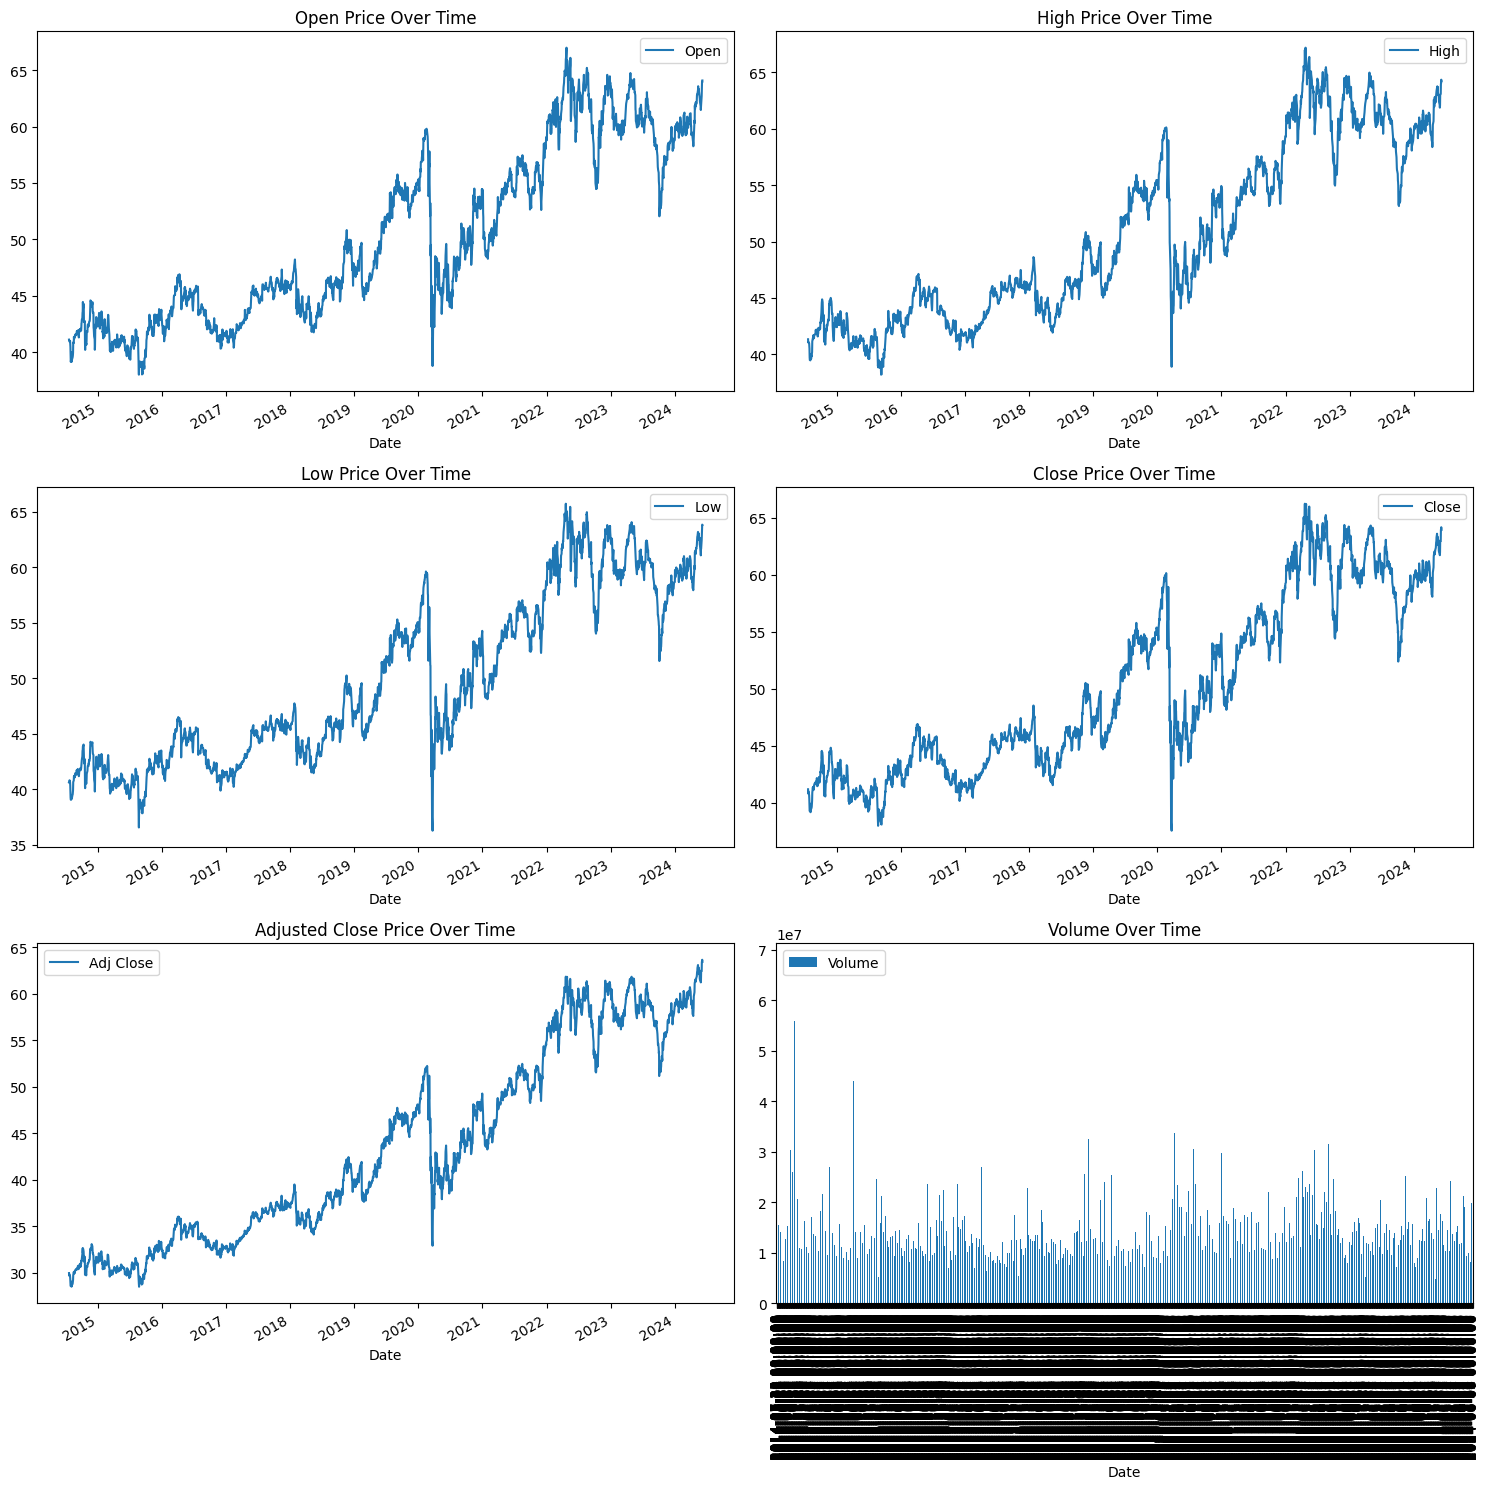

KeyError: 'Daily Return'

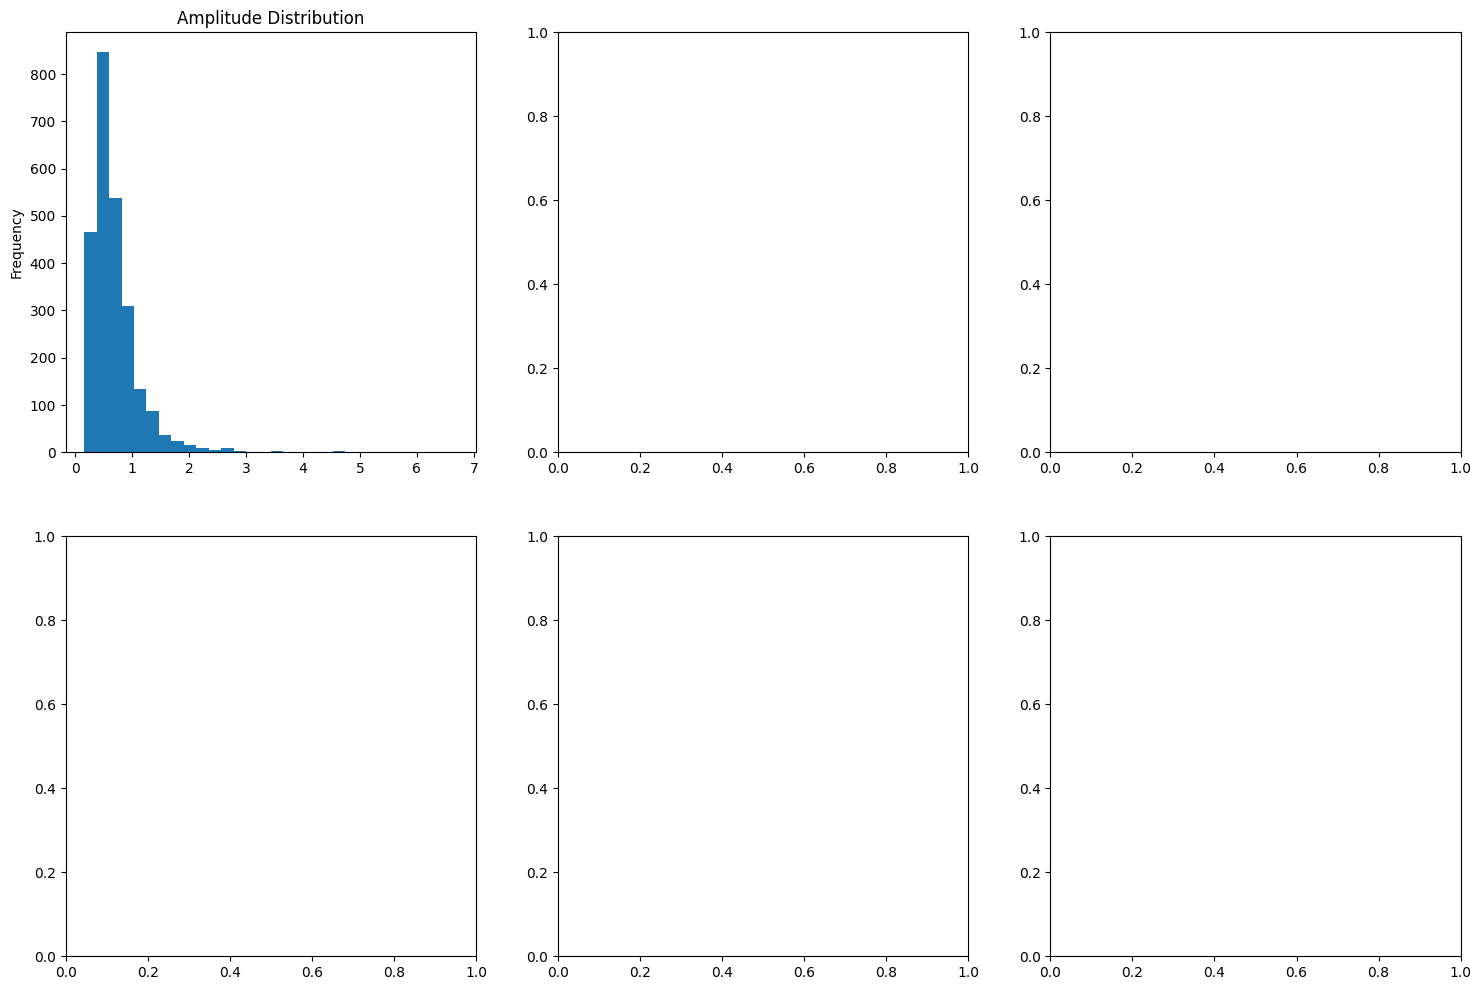

In [ ]:
## Plotting all the diagrams for all the columns

# something weird with a 'Volume' visualization
# but too lazy to figure it out. My guess is that it's just unsuitable for visualization due to a bunch
# of different values but need your thoughts
# this is where we can comment on AGR being consistent so we will delete it in data pre-processing

# size for all diagrams
plt.figure(figsize=(14, 8))

# diagram (line plot) for Open, High, Low, Close, Adj Close
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

amazon_df.plot(x='Date', y='Open', ax=axes[0, 0], title='Open Price Over Time')
amazon_df.plot(x='Date', y='High', ax=axes[0, 1], title='High Price Over Time')
amazon_df.plot(x='Date', y='Low', ax=axes[1, 0], title='Low Price Over Time')
amazon_df.plot(x='Date', y='Close', ax=axes[1, 1], title='Close Price Over Time')
amazon_df.plot(x='Date', y='Adj Close', ax=axes[2, 0], title='Adjusted Close Price Over Time')
amazon_df.plot(x='Date', y='Volume', kind='bar', ax=axes[2, 1], title='Volume Over Time')

plt.tight_layout()
plt.show()

# diagram (histogram) for Amplitude, Daily Return, True Range (TR), Percentage of daily growth, Absolute Daily Growth
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

amazon_df['Amplitude'].plot(kind='hist', bins=30, ax=axes[0, 0], title='Amplitude Distribution')
amazon_df['Daily Return'].plot(kind='hist', bins=30, ax=axes[0, 1], title='Daily Return Distribution')
amazon_df['True Range (TR)'].plot(kind='hist', bins=30, ax=axes[0, 2], title='True Range (TR) Distribution')
amazon_df['Percentage of daily growth'].plot(kind='hist', bins=30, ax=axes[1, 0], title='Percentage of Daily Growth Distribution')
amazon_df['Absolute Daily Growth'].plot(kind='hist', bins=30, ax=axes[1, 1], title='Absolute Daily Growth Distribution')

axes[1, 2].axis('off')  # empty subplot

plt.tight_layout()
plt.show()

# diagram (line plot) for MA7, MA30, Average True Range (ATR), Relative Strength Index (RSI), Annual growth percentage
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

amazon_df.plot(x='Date', y='MA7', ax=axes[0, 0], title='MA7 Over Time')
amazon_df.plot(x='Date', y='MA30', ax=axes[0, 1], title='MA30 Over Time')
amazon_df.plot(x='Date', y='Average True Range (ATR)', ax=axes[1, 0], title='Average True Range (ATR) Over Time')
amazon_df.plot(x='Date', y='Relative Strength Index (RSI)', ax=axes[1, 1], title='Relative Strength Index (RSI) Over Time')

axes[2, 1].axis('off')  # empty subplot

plt.tight_layout()
plt.show()

# diagram *bar plot) for Day and Month
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

amazon_df['Day'].value_counts().plot(kind='bar', ax=axes[0], title='Transactions by Day')
amazon_df['Month'].value_counts().plot(kind='bar', ax=axes[1], title='Transactions by Month')

plt.tight_layout()
plt.show()


<Axes: >

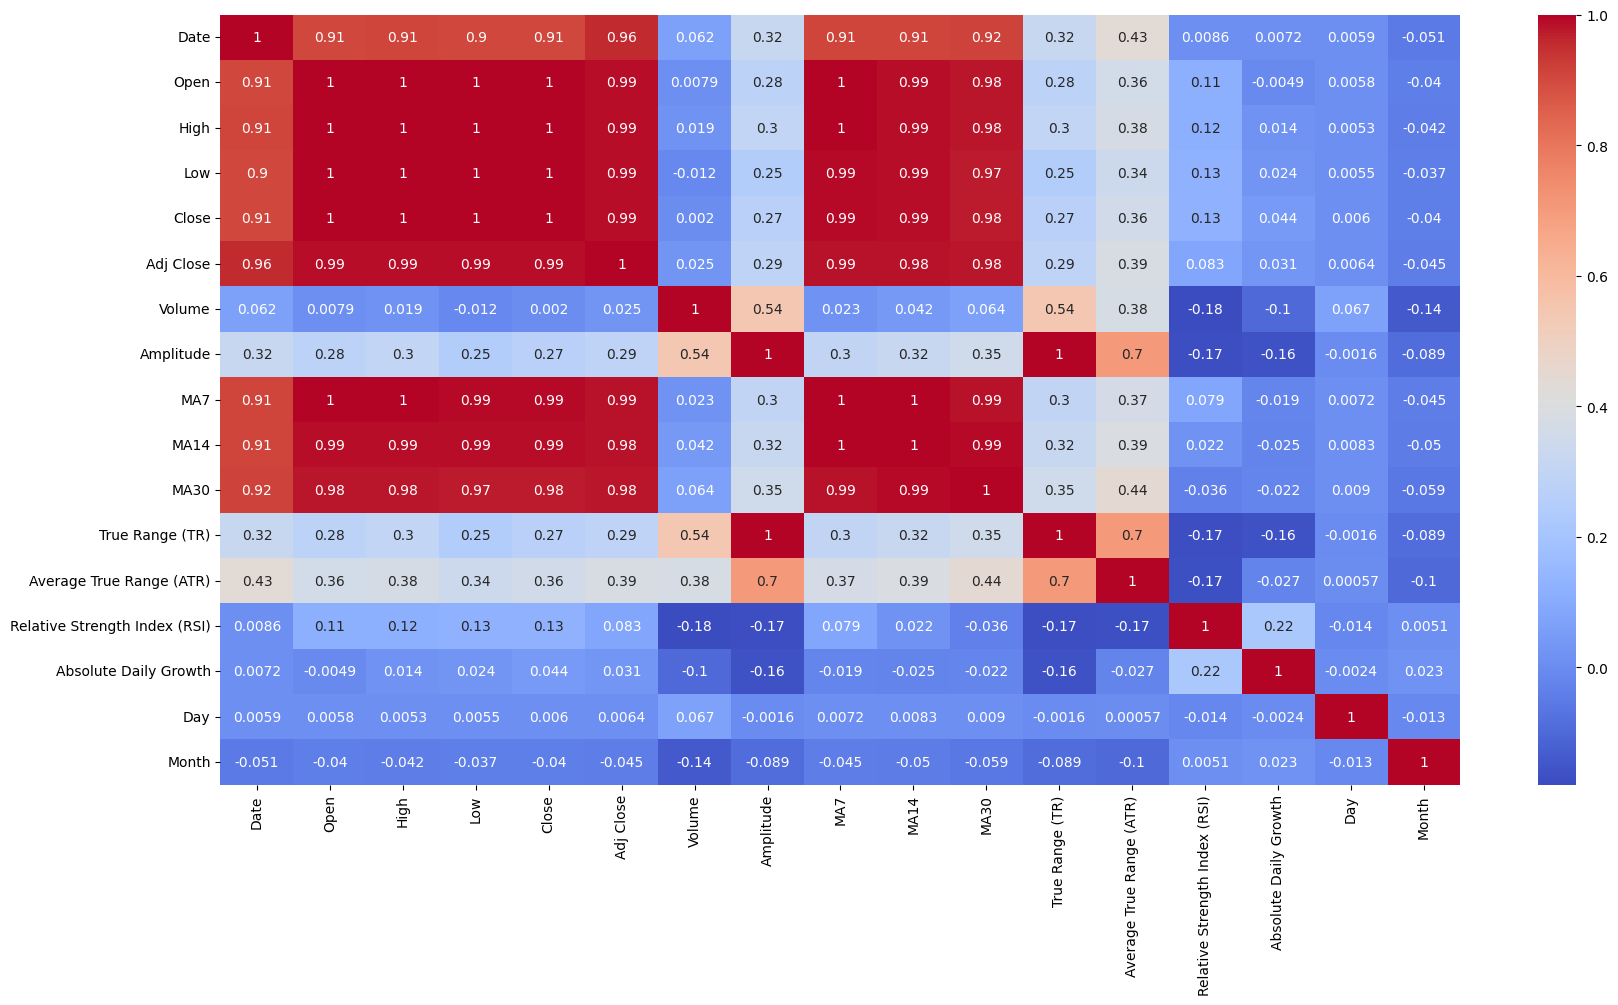

In [ ]:
# Heatmap
plt.figure(figsize=(20, 10))


list_features = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Amplitude", "MA7", "MA14", "MA30", "True Range (TR)", "Average True Range (ATR)",
                 "Relative Strength Index (RSI)", "Absolute Daily Growth","Day", "Month"]

# Note change day and month

sns.heatmap(amazon_df[list_features].corr(), cmap="coolwarm", annot=True)

<Axes: >

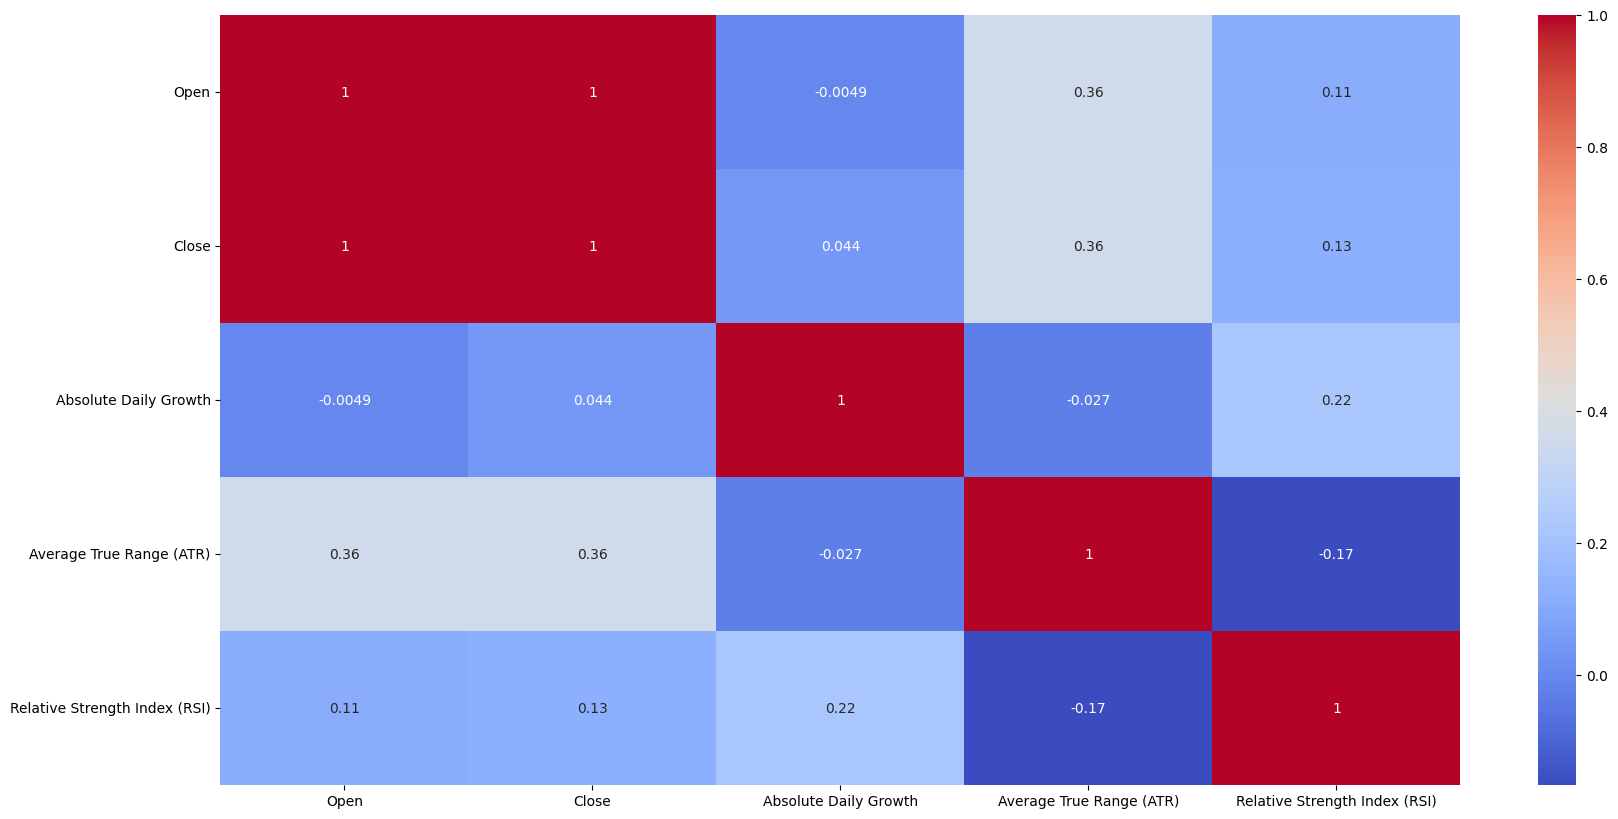

In [ ]:
# Heatmap - After removing variables


plt.figure(figsize=(20, 10))


list_features = ["Open", "Close", "Absolute Daily Growth", "Average True Range (ATR)", "Relative Strength Index (RSI)"]

# Note change day and month

sns.heatmap(amazon_df[list_features].corr(), cmap="coolwarm", annot=True)

# Creating the regression model

In [ ]:
# Defining y and x variables

y = amazon_df["Close"]
X = amazon_df[["Open", "High", "Low","Adj Close", "MA7", "MA14", "MA30"]]   # Date column cannot be used

In [ ]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
# Creating and training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)   # Training the ML Algo with the training

LinearRegression()

In [ ]:
# Generating m and c

print(regressor.intercept_)   # c
print(regressor.coef_)        # m1, m2, m3, m4, m5, m6, m7, m8

0.38318308676241486
[-0.56367733  0.74098636  0.76441451  0.0173887   0.05562283 -0.01030554
 -0.00952446]


In [ ]:
# Mapping the output to get a better overview

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients,
                               index = feature_names,
                               columns = ["Coefficient value"])

print(coefficients_df)

           Coefficient value
Open               -0.563677
High                0.740986
Low                 0.764415
Adj Close           0.017389
MA7                 0.055623
MA14               -0.010306
MA30               -0.009524


In [ ]:
# Prediction

y_pred = regressor.predict(X_test)    # Testing the algorithm with the X variables alone

In [ ]:
# Outputting the results

results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results)

         Actual  Predicted
1056  46.599998  46.588939
1342  53.580002  53.665724
2122  60.880001  60.419027
2000  61.200001  61.957660
1691  48.990002  49.298510
...         ...        ...
2082  59.529999  59.630255
445   45.049999  44.747029
501   45.369999  45.340846
819   46.299999  46.175244
1479  45.430000  45.476120

[498 rows x 2 columns]


In [ ]:
# Check the error
# Calculating the error parameters
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_pred, y_test)

print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"Mean absolute percentage error: {mape:}")

Mean absolute error: 0.17
Mean squared error: 0.05
Root mean squared error: 0.23
Mean absolute percentage error: 0.0032370202624170067


# Potential code for project

29     2014-07-22
30     2014-07-23
31     2014-07-24
32     2014-07-25
33     2014-07-28
          ...    
2512   2024-06-03
2513   2024-06-04
2514   2024-06-05
2515   2024-06-06
2516   2024-06-07
Name: Date, Length: 2488, dtype: datetime64[ns]


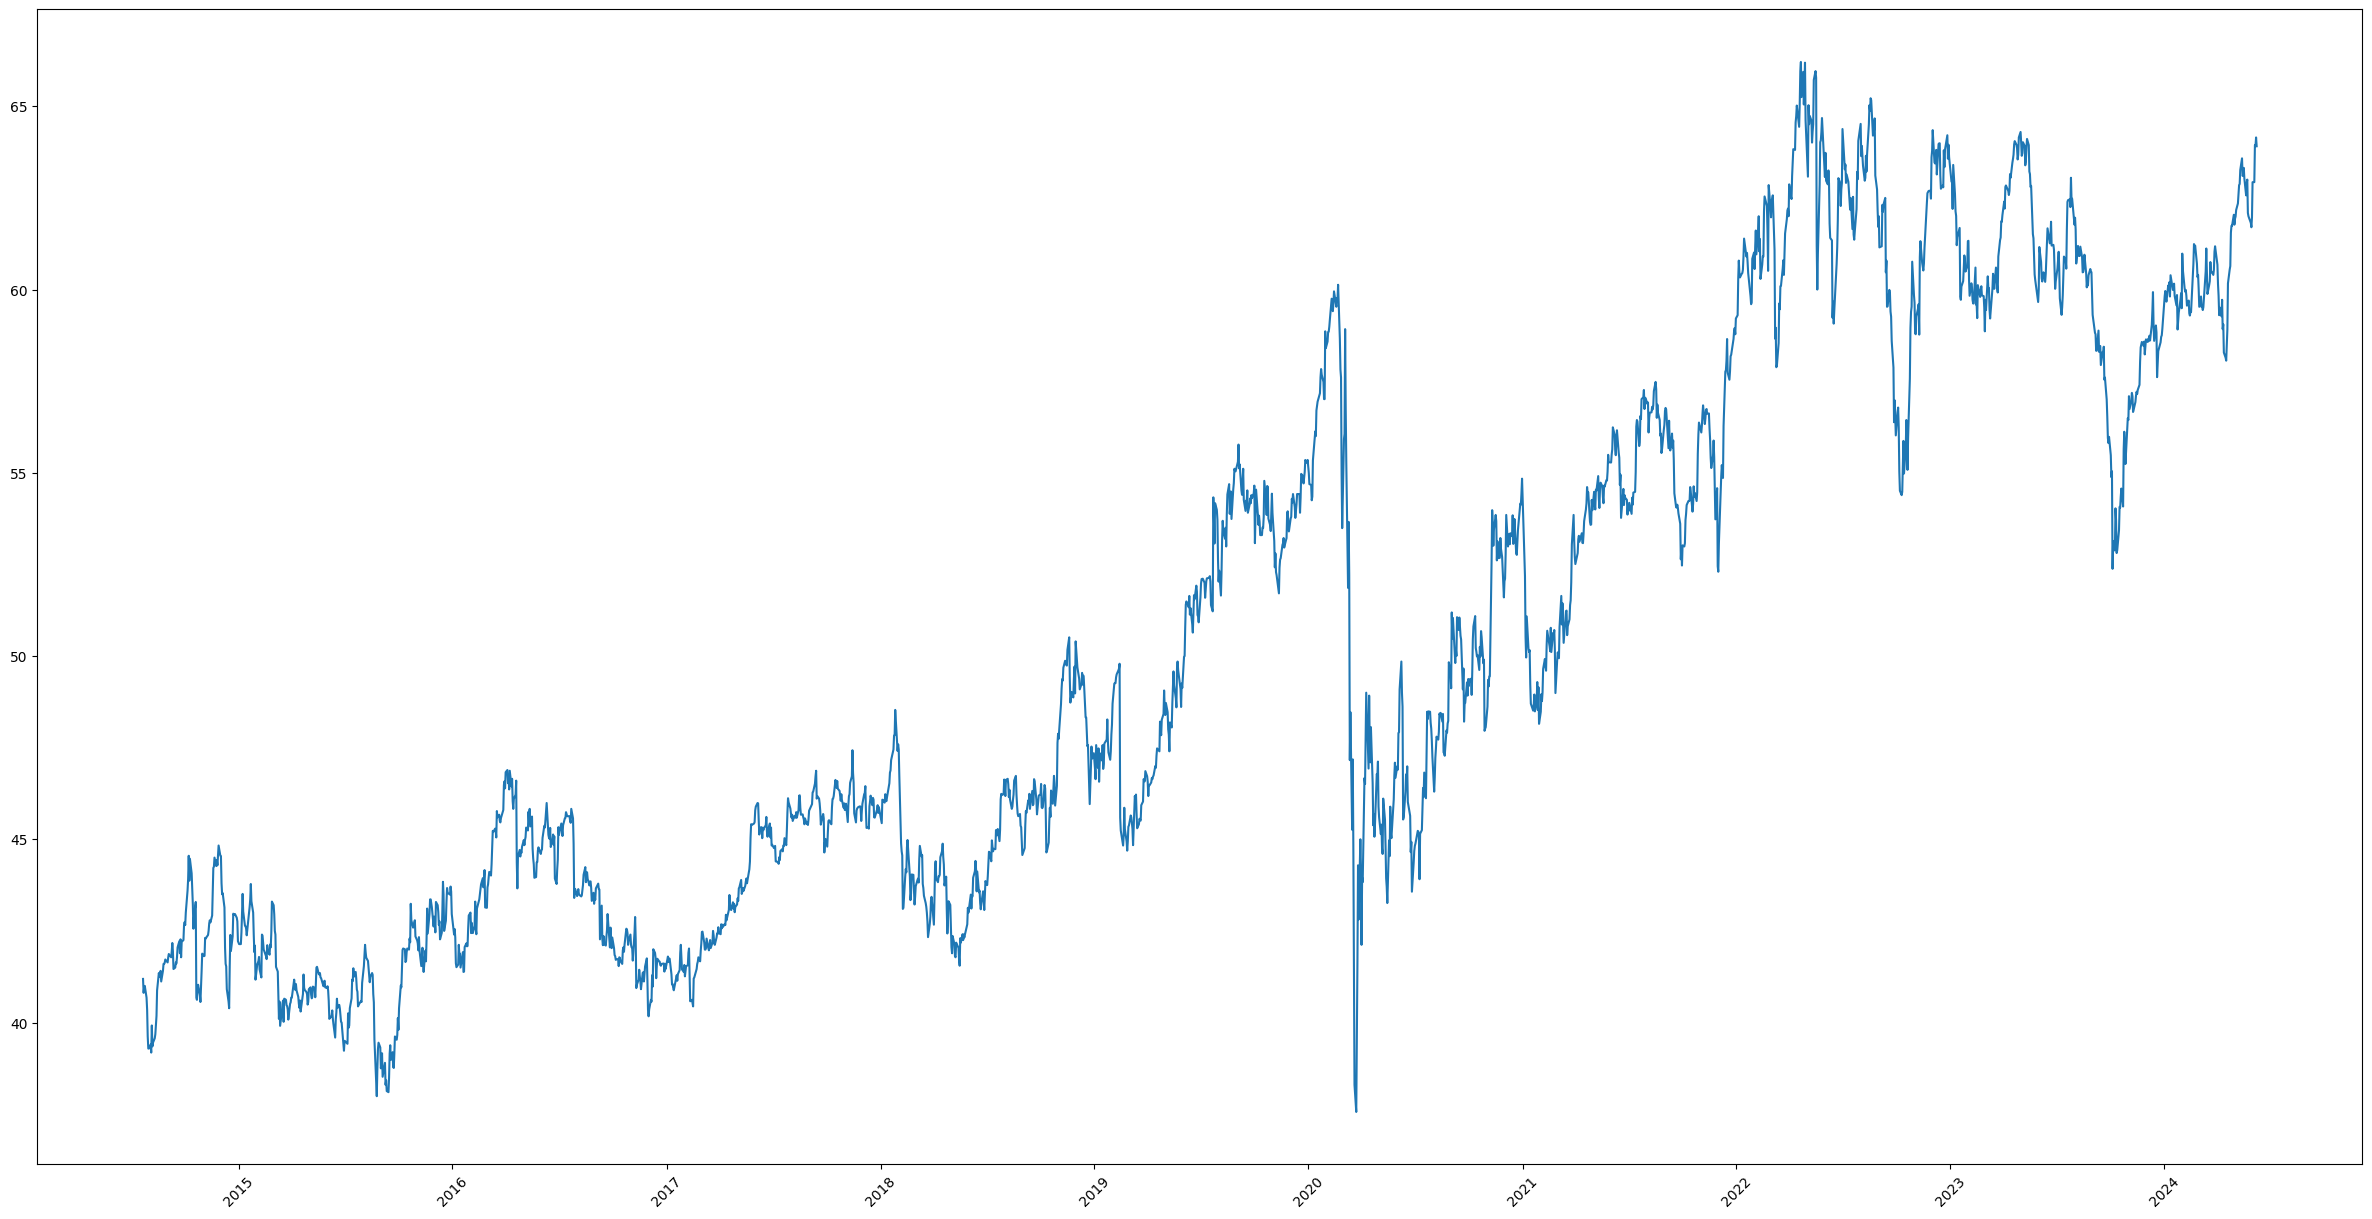

KeyError: "['ATR (Average True Range)'] not in index"

In [ ]:

#### Taken from the Tesla stock price prediction ####

import pandas as pd

amazon_df['Date'] = pd.to_datetime(amazon_df['Date'], format='%Y-%m-%d')
print(amazon_df["Date"])

import matplotlib.pyplot as plt
plt.figure(figsize = (30,15))#adjust the figure size
plt.plot(amazon_df["Date"], amazon_df["Close"])
plt.xticks(rotation = 45)#rotate x-axis 90 degree
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = ["Open", "Volume", "Absolute Daily Growth", "ATR (Average True Range)", "Relative Strength Index (RSI)"] # variables with best explanatory power and small multicollinarity have been chosen (heatmap)
X = amazon_df[features]
y = amazon_df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

prediction_y = model.predict(X_test)#prediction output

dates =  amazon_df.iloc[X_test.index]["Date"]

prediction_df = pd.DataFrame({"Date": dates, "Predicted Closing Price": prediction_y})
prediction_df.sort_values("Date", inplace=True)


#draw the graph
plt.figure(figsize = (30,15))
plt.plot(amazon_df["Date"], amazon_df["Close"], label = "Actual Closing Price")
plt.plot(prediction_df["Date"], prediction_df["Predicted Closing Price"], label = "Predicted Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.show()